# Dynamics of a Double Pendulum

In this notebook, we will study the dynamics of a double pendulum. Like before, we'll derive the equations of motion from the Lagrangian and the Hamiltonian. We can use the same methods of integration as before, but this time there is no analytical solution to compare to. Finally, we will look at the properties of the system in phase space using Poincare sections.

## Background

The double pendulum problem is a relatively simple system which can produce surprisingly complex motion. It is a chaotic system, meaning it is unpredictable and small changes in initial conditions lead to large changes in motion. There is no closed form solution to the motion of the two masses. This is a frequent example problem in the study of dynamic systems, nonlinear controls, and mechanics.

In this notebook we will be treating the two rods as massless and we'll start out ignoring the effects of friction. For a treatment of this problem without these assumptions, see [4].

See the image below for the definition of constants.

![Image](figures/diagram.png)
#### Figure 1. Diagram of Double Pendulum System

## Equations of Motion 

As a reminder, the Lagrangian is
$$\begin{equation*}
L = T- U
\end{equation*}$$
where $T$ is the total Kinetic Energy in the system, and $U$ is the total Potential Energy. Potential energy is calculated as:

$$\begin{eqnarray*}
U &=& m_1g(-y_1) + m_2g(-y_2) \\
 &=& -m_1gl_1cos\theta_1 - m_2g(l_1cos\theta_1 + l_2cos\theta_2)
\end{eqnarray*}$$

Kinetic Energy is calculated as:

$$\begin{eqnarray*}
T &=& \frac{1}{2}mv_1^2+\frac{1}{2}mv_2^2 \\
&=& \frac{1}{2}m_1(l_1\dot\theta_1)^2 + \frac{1}{2}m_2(l_1\dot\theta_1 + l_2\dot\theta_2)^2 \\
&=& \frac{1}{2}(m_1+m_2)l_1^2\dot\theta_1^2+\frac{1}{2}m_2\left(2l_1l_2\dot\theta_1\dot\theta_2cos(\theta_2-\theta_1)+l_2^2\dot\theta_2^2\right)
\end{eqnarray*}$$


So the Lagrangian quantity becomes:
$$\begin{equation*}
L = \frac{1}{2}(m_1+m_2)l_1^2\dot\theta_1^2+m_2l_1l_2\dot\theta_1\dot\theta_2cos(\theta_2-\theta_1)+(m_1+m_2)l_1gcos\theta_1 + m_2l_2gcos\theta_2
\end{equation*}$$


The equations of motion are then found using the Lagrange Equation:

$$\begin{equation*}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x_i}}\right) - \frac{\partial L}{\partial x_i} = 0
\end{equation*}$$


There are two generalized coordinates ($\theta_1$ and $\theta_2$). So the equation of motion for $\theta_1$ is calculated by the following steps:

$$\begin{eqnarray*}
\frac{\partial L}{\partial \dot{\theta_1}} &=& (m_1+m_2)l_1^2\dot\theta_1+m_2l_1l_2\dot\theta_2cos(\theta_2-\theta_1) \\
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta_1}}\right) &=& (m_1+m_2)l_1^2\ddot\theta_1+m_2l_1l_2\ddot\theta_2cos(\theta_2-\theta_1)-m_2l_1l_2\dot\theta_2^2sin(\theta_2-\theta_1)+m_2l_1l_2\dot\theta_1\dot\theta_2sin(\theta_2-\theta_1) \\
-\frac{\partial L}{\partial \theta_1} &=& -m_2l_1l_2\dot\theta_1\dot\theta_2sin(\theta_2-\theta_1)-(m_1+m_2)gl_1sin\theta_1
\end{eqnarray*}$$

We can add together the second and third equations to find the first equation of motion. Some of these terms will cancel out, and we are left with a final equation of motion:

$$\begin{equation*}
0 = (m_1+m_2)l_1^2\ddot\theta_1+m_2l_1l_2\ddot\theta_2cos(\theta_2-\theta_1)-m_2l_1l_2\dot\theta_2^2sin(\theta_2-\theta_1)+(m_1+m_2)gl_1sin\theta_1
\end{equation*}$$

We will also need the equation of motion for $\theta_2$. This can be derived using the same process. It should work out to the following (check this by yourself!):

$$\begin{equation*}
0 = m_2l_2^2\ddot\theta_2+m_2l_1l_2\ddot\theta_1cos(\theta_2-\theta_1) - m_2l_2l_1\dot\theta_1^2sin(\theta_2-\theta_1)+ l_2m_2gsin\theta_2
\end{equation*}$$

## Problem setup

Notice that these equations of motion are implicit equations for $\ddot\theta_1$ and $\ddot\theta_2$. Let's rewrite the equations of motion in a more readable form. We can use the standard form of this equation (which you'll be familiar with if you have studied any dynamics) by separating out mass terms (anything multiplied by $\ddot{x}$), centripetal terms (anything multiplied by $\dot{x}$), and gravitational terms (anything multiplied by $x$). We get the following equation of motion:

$$\begin{eqnarray*}
0 &=&\textbf{M}\vec{\ddot{x}}(t)  + \textbf{V}\dot{x} + \textbf{G} 
\end{eqnarray*}$$

The equation of motion can be solved for $\ddot{x}$:

$$ \ddot{x} = \textbf{M}^{-1}\left[ \textbf{V}\dot x + \textbf{G} \right]$$

where 

\begin{eqnarray*}
M = 
\left[\begin{array}{c}
(m_1+m_2)l_1 & m_2l_1l_2cos(\theta_2 - \theta_1)\\
 m_2l_1l_2cos(\theta_2 - \theta_1) &m_2l_2^2
\end{array}\right]
\end{eqnarray*}


\begin{equation*}
V = 
\left[\begin{array}{c}
0 & -m_2l_1l_2sin(\theta_2 - \theta_1)\\
 -m_2l_1l_2sin(\theta_2 - \theta_1) &0
\end{array}\right]
\end{equation*}


\begin{eqnarray*}
G = 
\left[\begin{array}{c}
(m_1+m_2)l_1gsin\theta_1\\
 m_2l_2gsin\theta_2
\end{array}\right]
\end{eqnarray*}

and

$$\begin{eqnarray*}
\vec{x}(t)  = \begin{bmatrix} \theta_1\\ \theta_2\\ \end{bmatrix}, \vec{\dot{x}(t)} = \begin{bmatrix} \dot \theta_1 \\ \dot \theta_2 \end{bmatrix}
\end{eqnarray*}$$

We can now treat this system the same way we handled the simple harmonic motion; break the two second order ODEs into four first-order ODEs, then use Euler or Runge-Kutta on the results.

### Equations of Motion from Hamiltonian

Here we derive the equations of motion from the Hamiltonian. If you want good practice, you can derive these on your own. If you want to see another derivation with nice animations, you can see [1]. We start with the same potential and kinetic energy as before, but we'll need to use postion ($\theta$) and momentum ($I\omega$)  to give us:

$$\begin{eqnarray*}
U &=& m_1g(-y_1) + m_2g(-y_2) \\
 &=& -m_1gl_1cos\theta_1 - m_2g(l_1cos\theta_1 + l_2cos\theta_2) \\
 &=& -m_1gl_1cos(p_1) - m_2g(l_1cos(p_1) + l_2cos(p_2))
\end{eqnarray*}$$

Kinetic Energy for rotational motion calculated as:

$$\begin{eqnarray*}
T &=& \frac{1}{2}(m_1+m_2)l_1^2\dot\theta_1^2+\frac{1}{2}m_2\left(2l_1l_2\dot\theta_1\dot\theta_2cos(\theta_2-\theta_1)+l_2^2\dot\theta_2^2\right)\\
&=& \frac{1}{2}(I_1 + m_2l_1^2)\omega_1^2+\left[m_2l_1l_2\omega_1\omega_2cos(\theta_2-\theta_1)+\frac{I_2\omega_2^2}{2}\right] \\
&=& \frac{q_1^2}{2I_1}+\frac{m_2l_1^2q_1^2}{2m_1I_1}  + \left[ \frac{q_2}{l_2} \frac{q_1}{m_1l_1}cos(p_2-p_1) + \frac{q_2^2}{2I_2} \right]
\end{eqnarray*}$$



where $I_i$ is the angular moment of inertia and $\omega$ is the angular velocity. So our Hamiltonian quantity becomes:
$$\begin{equation*}
H = \frac{q_1^2}{2I_1}+\frac{m_2l_1^2q_1^2}{2m_1I_1}  + \left[ \frac{q_2}{l_2} \frac{q_1}{m_1l_1}cos(p_2-p_1) + \frac{q_2^2}{2I_2} \right] -m_1gl_1cos(p_1) - m_2g\left( l_1cos(p_1) + l_2cos(p_2) \right)
\end{equation*}$$

Since we have two degrees of freedom, we will have four equations of motion. These will be the following:
$$\begin{eqnarray*}
\dot{p_1} &=& -\frac{\partial H}{\partial q_1} = -\frac{q_1}{I_1} - \frac{m_2l_1^2q_1}{m_1I_1} - \frac{q_1}{l_2m_1l_1}cos(p_2-p_1) \\
\dot{q_1} &=&  \frac{\partial H}{\partial p_1} =  \frac{q_1q_2}{m_1l_1l_2}sin(p_2-p_1) + (m_1+m_2)gl_1sin(p_1) \\
\dot{p_2} &=& -\frac{\partial H}{\partial q_2} = -\frac{q_1}{m_1l_1l_2}cos(p_2-p_1) - \frac{q_2}{I_2} \\
\dot{q_2} &=&  \frac{\partial H}{\partial p_2} = -\frac{q_1q_2}{m_1l_1l_2}sin(p_2-p_1) + m_2l_2gsin(p_2)\\
\end{eqnarray*}$$

## Integration

For Euler and Runge-Kutta, we can use the matrix equation above to integrate our system. The results will be VERY dependent on initial conditions; this is why we call it a chaotic system. For the symplectic integrator, we'll use the Hamiltonian equations of motion above. 

In [25]:
import numpy
from scipy.linalg import solve
from numpy.linalg import det
from math import pi, cos, sin, sqrt

from matplotlib import pyplot
from matplotlib.pyplot import quiver
%matplotlib notebook
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [31]:
def f_double_pendulum(u):
    """Returns RHS of double pendulum EOM
    
    Parameters:
        q - initial state
    
    Returns:
        RHS - RHS of harmonic oscillator eqn.
    
    """
    x1 = u[0]
    x2 = u[1]
    x3 = u[2]
    x4 = u[3]
    
    M = numpy.array([[(m1+m2)*l1**2, m2*l1*l2*cos(x2-x1)],[m2*l1*l2*cos(x2-x1), m2*l2**2]])
    V = numpy.array([[0, -m2*l1*l2*sin(x2-x1)],[-m2*l1*l2*sin(x2-x1), 0]])
    G = numpy.array([[(m1+m2)*g*l1*sin(x1)],[m2*l2*g*sin(x2)]])
    qdd = numpy.linalg.inv(M).dot(V.dot(numpy.array([[x3],[x4]])) +G) #- 2*numpy.array([[x3],[x4]])) 
    #print(qdd)
    #print(M)
    #print(V.dot(numpy.array([[x3],[x4]])))
    #print(G)
    RHS = numpy.array([[x3, x4, qdd[0], qdd[1]]])
    #print(RHS.T)
    return RHS.T

In [32]:
#Set up parameters:
g = -9.8 #[m/s^2]
m1 = 2
m2 = 1.5;
l1 = 1
l2 = 1.5
I1 = m1*l1**2
I2 = m2*l2**2

T = 25; #[seconds]
dt = .02; #
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

#Initial Conditions
theta1_0 = 1 #[radians]
theta2_0 = pi
theta1_dot_0 = 0 #[rad/s]
theta2_dot_0 = 0 #

p1_0 = theta1_0
q1_0 = m1*theta1_dot_0
p2_0 = theta2_0
q2_0 = m2*theta2_dot_0

x_init_dp = numpy.array([theta1_0, theta2_0, theta1_dot_0, theta2_dot_0])
x_init_H_dp = numpy.array([p1_0, q1_0, p2_0, q2_0])



In [33]:
def euler_DP(u, f, dt):
    """ Euler's method for integrating a system of differential equations.
    
    Parameters:
        u - state at current step 
        f - RHS of equation
        dt- time step size
    
    Returns: 
        x - array of values at next time step.
    """
    #print(f(u))
    #print(u)
    
    return u + dt*f(u).T    

In [34]:
def RK4_DP(u,f, dt):
    """Runge Kutta fourth order integration method
    
    Parameters:
        u - state of the system at time t
        f - function for RHS of state equations
        dt - time step
        
    Returns: array of state values at next time step.
    """
    k1 = f(u).T
    k2 = f(u).T + 0.5*dt*k1
    k3 = f(u).T + 0.5*dt*k2
    k4 = f(u).T + dt*k3  
    
    return u + dt/6*(k1+2*k2+2*k3+k4)

<IPython.core.display.Javascript object>


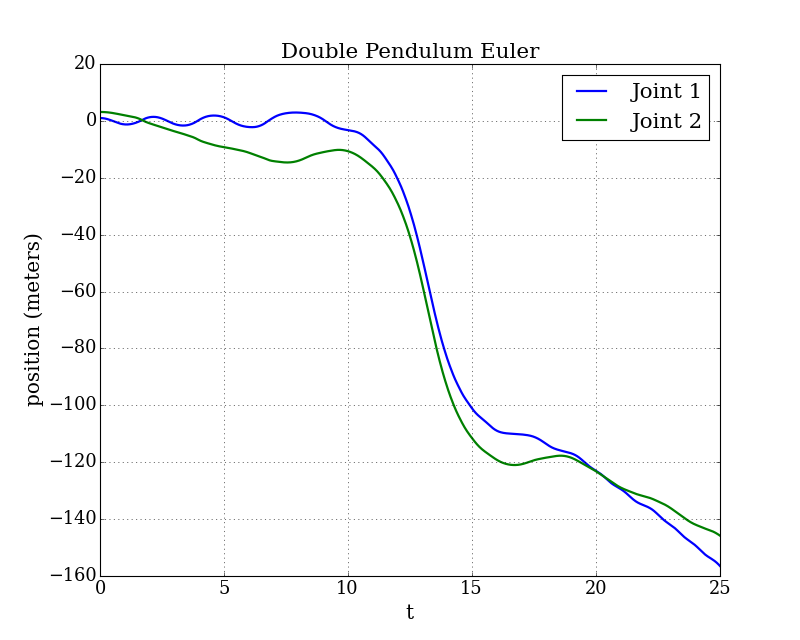

<IPython.core.display.Javascript object>


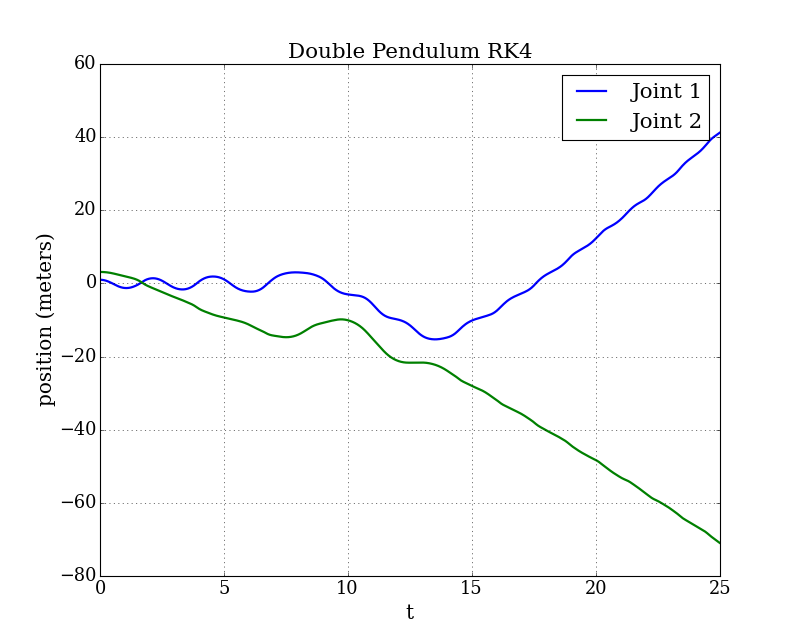

In [35]:
#Euler
q1_dp = numpy.zeros((N,4)) 
q1_dp[0,:] = x_init_dp.copy() #set initial conditions
for n in range(N-1):  #integrate with Euler
    q1_dp[n+1,:] = euler_DP(q1_dp[n,:], f_double_pendulum, dt)
    #print(q1[n])
    
#Runge-Kutta
q2_dp = numpy.zeros((N,4)) 
q2_dp[0,:] = x_init_dp.copy() #set initial conditions
for n in range(N-1):  #integrate with Euler
    q2_dp[n+1,:] = RK4_DP(q2_dp[n,:], f_double_pendulum, dt)
    
pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (meters)', fontsize=18);
pyplot.title('Double Pendulum Euler');
pyplot.plot(t, q1_dp[:,0], lw=2, label='Joint 1');
pyplot.plot(t, q1_dp[:,1], lw=2, label='Joint 2')
pyplot.legend();

pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (meters)', fontsize=18);
pyplot.title('Double Pendulum RK4');
pyplot.plot(t, q2_dp[:,0], lw=2, label='Joint 1');
pyplot.plot(t, q2_dp[:,1], lw=2, label='Joint 2')
pyplot.legend();

Again, we can see that these integrators cause the system to go unstable. In fact, there is a physical interpretation for what is happening. In the RK4 plot, you can see the position of joint 1 oscillating betwee -pi and pi (corresponding to straight up in the air), until it finally reaches a value less than -pi. So, once joint 1 'flips around,' the system diverges.

With simple harmonic motion, the symplectic integrator was able to accurately represent the state of the system without adding energy. Let's see if it is successful with the double pendulum. 

In [55]:
def Verlet_DP(u, dt):
    """ Verlet integration for integrating from Hamiltonian equations of motion
            for a ddouble pendulum
    Parameters:
        u - state at current time step
        dt - time step size
    Returns: 
        state at next time step.
    """
    p1 = u[0]
    q1 = u[1]
    p2 = u[2]
    q2 = u[3]
    
    p1_half = p1 - dt/2*(q1/I1 + m2*l1**2*q1/(m1*I1) + q1/(m1*l1*l2)*cos(p2-p1))
    q1 = q1 + dt*(q1*q2/(m1*l1*l2)*sin(p2-p1_half) + (m1+m2)*g*l1*sin(p1_half))
    p1 = p1_half - dt/2*(q1/I1 + m2*l1**2*q1/(m1*I1) + q1/(m1*l1*l2)*cos(p2-p1))
    
    p2_half = p2 - dt/2*(q1/(m1*l1*l2)*cos(p2-p1) - q2/I2)
    q2 = q2 - dt*(-q1*q2/(m1*l1*l2)*sin(p2_half-p1) + m2*l2*g*sin(p2))
    p2 = p2_half - dt/2*(q1/(m1*l1*l2)*cos(p2-p1) - q2/I2)
     
    return numpy.array([p1, q1, p2, q2]) 

[ 1.          0.          3.14159265  0.        ]


<IPython.core.display.Javascript object>


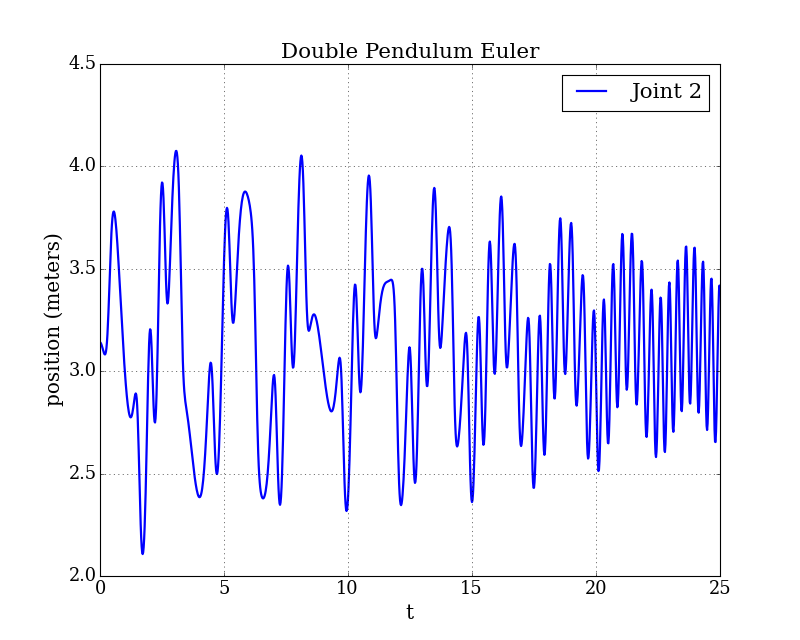

In [56]:
#Verlet integration
q3_dp = numpy.zeros((N,4)) 
q3_dp[0,:] = x_init_H_dp.copy() #set initial conditions
print(q3_dp[0,:])
for n in range(N-1):  #integrate with Euler
    q3_dp[n+1,:] = Verlet_DP(q3_dp[n,:], dt)
    
pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (meters)', fontsize=18);
pyplot.title('Double Pendulum Euler');
#pyplot.plot(t, q3_dp[:,0], lw=2, label='Joint 1');
pyplot.plot(t, q3_dp[:,2], lw=2, label='Joint 2')
pyplot.legend();

In [57]:
#To Do:
# plot total energy in system
# animate motion of double pendulum
# Poincare section for symplectic DP
# animate Poincare sections
# check through sources

### Damped Double Pendulum

Just like with simple harmonic motion, we can add in a damping term to help remove some of the energy that the integration scheme adds in. In the problem setup, we actually used an abbreviated form of a standard equation. The full equation is here:

\begin{equation}
\textbf{M}(x)\vec{\ddot{x}}(t)  + \textbf{V}(x, \dot x ) \vec{\dot{x}} + \textbf{G(x)} + f(\dot x) + \tau_d(t) = \tau(t)
\end{equation}

where $\textbf{M, V}$, and $\textbf{G}$ are defined as above, $f$ is frictional or damping terms, and the $\tau$ terms represent added torque to the system. Since we aren't adding any torque, the $\tau$ terms will remain 0. However, we can add in some linear damping by including the frictional term. This requires redefining our RHS function, but no other changes!

In [38]:
def f_damped_double_pendulum(u):
    """Returns RHS of double pendulum EOM
    
    Parameters:
        q - initial state
    
    Returns:
        RHS - RHS of harmonic oscillator eqn.
    
    """
    x1 = u[0]
    x2 = u[1]
    x3 = u[2]
    x4 = u[3]
    
    M = numpy.array([[(m1+m2)*l1**2, m2*l1*l2*cos(x2-x1)],[m2*l1*l2*cos(x2-x1), m2*l2**2]])
    V = numpy.array([[0, -m2*l1*l2*sin(x2-x1)],[-m2*l1*l2*sin(x2-x1), 0]])
    G = numpy.array([[(m1+m2)*g*l1*sin(x1)],[m2*l2*g*sin(x2)]])
    f = c*numpy.array([[x3],[x4]])
    qdd = numpy.linalg.inv(M).dot(V.dot(numpy.array([[x3],[x4]]))+G -f) 
    #print(qdd)
    #print(M)
    #print(V.dot(numpy.array([[x3],[x4]])))
    #print(G)
    RHS = numpy.array([[x3, x4, qdd[0], qdd[1]]])
    #print(RHS.T)
    return RHS.T

<IPython.core.display.Javascript object>


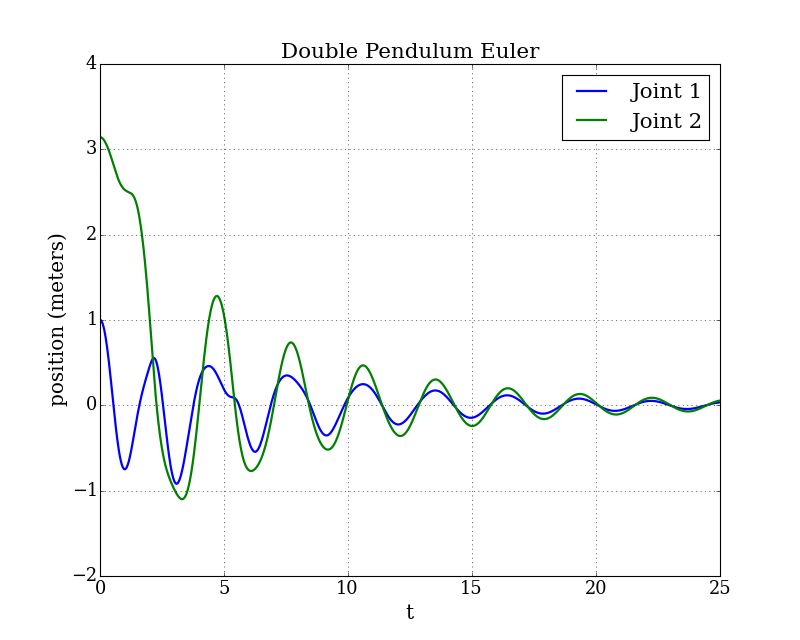

<IPython.core.display.Javascript object>


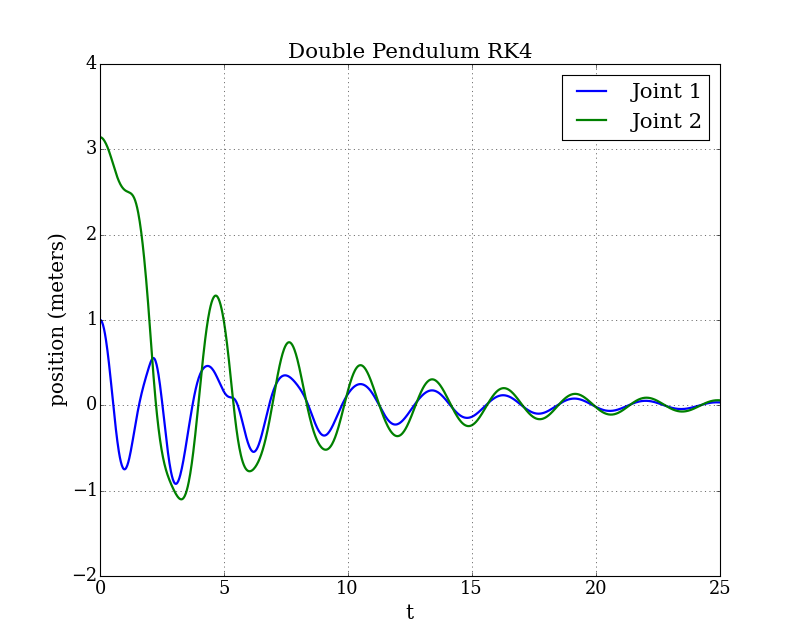

In [39]:
#We use the same initial conditions as the example without damping, so they aren't redefined here.
c = 2 #[N/(rad/s)] define some damping

#Euler
q1d_dp = numpy.zeros((N,4)) 
q1d_dp[0,:] = x_init_dp.copy() #set initial conditions
for n in range(N-1):  #integrate with Euler
    q1d_dp[n+1,:] = euler_DP(q1d_dp[n,:], f_damped_double_pendulum, dt)
    #print(q1[n])
    
#Runge-Kutta
q2d_dp = numpy.zeros((N,4)) 
q2d_dp[0,:] = x_init_dp.copy() #set initial conditions
for n in range(N-1):  #integrate with Euler
    q2d_dp[n+1,:] = RK4_DP(q2d_dp[n,:], f_damped_double_pendulum, dt)
    
pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (meters)', fontsize=18);
pyplot.title('Double Pendulum Euler');
pyplot.plot(t, q1d_dp[:,0], lw=2, label='Joint 1');
pyplot.plot(t, q1d_dp[:,1], lw=2, label='Joint 2')
pyplot.legend();

pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r't', fontsize=18);
pyplot.ylabel(r'position (meters)', fontsize=18);
pyplot.title('Double Pendulum RK4');
pyplot.plot(t, q2d_dp[:,0], lw=2, label='Joint 1');
pyplot.plot(t, q2d_dp[:,1], lw=2, label='Joint 2')
pyplot.legend();

### Investigating system behavior

In order to investigate system behavior for damped harmonic motion, we used a phase portrait where we plotted position vs. velocity. In this system, we have 2 positions and 2 velocities, so a phase plot won't accurately capture the behavior of the system. Instead we are going to use something called a Poincare section (https://en.wikipedia.org/wiki/Poincar%C3%A9_map). The way these work is to capture the system behavior at a specific, repetetive point. For example, each time that $\theta_1 = 0$ (mass 1 is hanging straight down) we can capture the angular position and velocity of mass 2. This way, we are taking a 'snapshot' of the system, and plotting the state each time. We can now investigate system behavior on a simple 2D plot, similar to the phase portrait.

In [40]:
def poincare(state, sf, val, s1, s2):
    '''Creates a poincare section, capturing system state each time q[state]=val
    
    Parameters:
        state - state vector
        sf - the row in q to fix
        val - the value to capture state at 
        s1 - state to capture 1
        s2 - state to capture 2
        
    Returns:
        v - array with information for poincare section
    '''
    v = numpy.zeros((2,1))
    for i in range(len(state[:,sf])-1):
        if (state[i,sf]>val):
            if (state[i+1,sf] < val):
                # print(v)
                # print([[state[i, s1],[state[i, s2]]]])
                v = numpy.append(v, [[state[i, s1]],[state[i, s2]]], axis=1)
        
        if (state[i,sf] < val):
            if (state[i+1,sf] > val):
                v = numpy.append(v, [[state[i, s1]],[state[i, s2]]], axis=1)
                         
    return v
    

(2, 19)


<IPython.core.display.Javascript object>


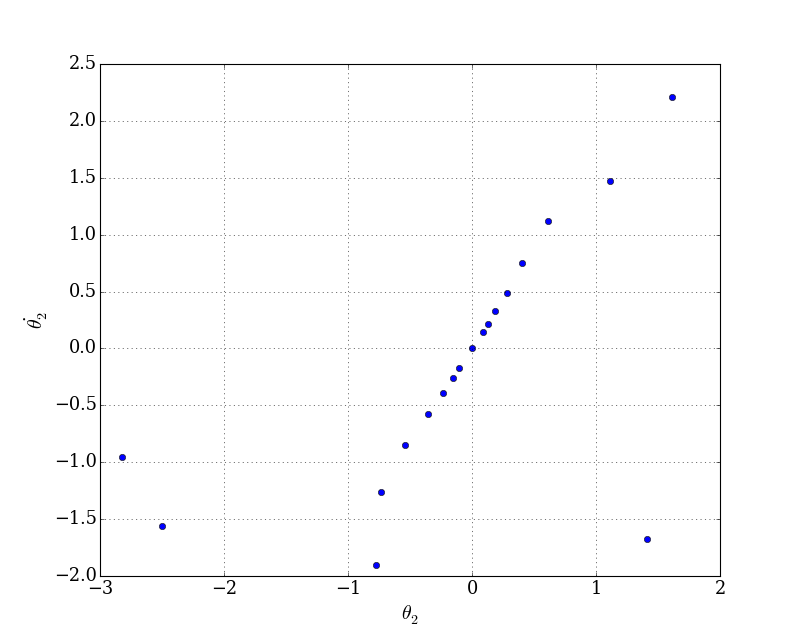

In [41]:
v = poincare(q2d_dp, 0, 0, 2, 3) #use states from RK4 integration
print(numpy.shape(v))
pyplot.figure(figsize=(10,8));
pyplot.grid(True);
pyplot.xlabel(r'$\theta_2$', fontsize=18);
pyplot.ylabel(r'$\dot{\theta_2}$', fontsize=18);#pyplot.title('Poincare Section');
pyplot.plot(v[0,:], v[1,:], 'bo', lw=2, );

from matplotlib import animation
from JSAnimation.IPython_display import display_animation
def animate(data):
    print(numpy.shape(data))
    x = data[0,:]
    y = data[1,:]
    line.set_data(x, y)
    return line,

In [42]:
# #(try to animate plot)
#fig = pyplot.figure();
#ax = pyplot.axes(xlim=(-10, 10), ylim=(-10,10),xlabel=(r'$\theta_2$'), ylabel=(r'$\dot{\theta_2}$'))
#line, = ax.plot([],[],'bo', lw=2);

#anim = animation.FuncAnimation(fig, animate, frames= v[:,:], interval=10)
#display_animation(anim, default_mode='once')

Other than a few outliers, the plot converges to (0,0). So, this system is stable! This would not be the case for the undamped double pendulum, as integrated by RK4. 

Sources: 

[1] http://scienceworld.wolfram.com/physics/DoublePendulum.html

[2] http://www.phy.uct.ac.za/courses/opencontent/phylab2/worksheet9_09.pdf

[3] http://www.phys.lsu.edu/faculty/gonzalez/Teaching/Phys7221/DoublePendulum.pdf

[4] http://www.iontrap.wabash.edu/adlab/papers/F2011_foster_groninger_tang_chaos.pdf

[5] https://math.berkeley.edu/~alanw/242papers99/markiewicz.pdf

[6] http://www.unige.ch/~hairer/poly_geoint/week2.pdf

[7] http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1994CeMDA..60..409T&defaultprint=YES&filetype=.pdf



In [43]:
# This cell loads the style of the notebook, which is modified from the 
# Numerical Methods in Python Course: http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about

from IPython.core.display import HTML
css_file = './numericalmoocstyle.css'
HTML(open(css_file, "r").read())